In [1]:
import scipy.io.wavfile as wavfile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
string_1 = wavfile.read('string_1.wav')
string_2 = wavfile.read('string_2.wav')
string_3 = wavfile.read('string_3.wav')

strings = {"E1" : 329.63, "B2" : 246.94, "G3" : 196.00, "D4" : 146.83, "A5" : 110.00, "E6" : 82.41}
cent_accuracies = {"E1" : 0.15, "B2" : 0.15, "G3" : 0.15, "D4" : 0.08, "A5" : 0.08, "E6" : 0.04}


In [23]:
def get_fft(signal):
    fft_half = np.fft.fft(signal[1])
    fftout = 2/len(fft_half) * np.abs(fft_half[0:int(len(fft_half)/2)])
    freq = np.fft.fftfreq(len(fft_half), 1/signal[0])
    freq = freq[:int(len(freq)/2)]
    return freq, fftout

def plot_freq(freq, fft):
    plt.plot(freq, fft)
    plt.xlim(0,1000)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()

#compute rolling average of freq
def find_best_frequency(freq, fft_out, window):
    #find the most likely note using rolling average
    #window is the number of points to average over
    #return the note and the average amplitude
    max_avg = 0
    max_index = 0
    for i in range(window//2, len(fft_out)-window//2):
        avg = np.mean(fft_out[i-window//2:i+window//2])
        
        if avg > max_avg:
            max_avg = avg
            max_index = i
    return freq[max_index], max_avg

#find note and cent accuracy
def get_cent_accuracy(frequency):
    #identify the string with the closest frequency
    #return the note and cent distance
    min_cent = 100000
    min_string = ""
    for string in strings:
        cent = np.abs(strings[string] - frequency)/cent_accuracies[string]
        if cent < min_cent:
            min_cent = cent
            min_string = string
    return min_string, min_cent

In [30]:
input_strings = [string_1, string_2, string_3]
for string in input_strings:
    freq, fft_out = get_fft(string)
    #plot_freq(freq, fft_out)

    frequency, max_avg = find_best_frequency(freq, fft_out, 30)

    note, cent = get_cent_accuracy(frequency)
    print("frequency %f Hz ; suggesting string %s with a cent accuracy of %f" % (frequency, note, cent))


frequency 330.608920 Hz ; suggesting string E1 with a cent accuracy of 6.526136
frequency 195.793049 Hz ; suggesting string G3 with a cent accuracy of 1.379673
frequency 109.235669 Hz ; suggesting string A5 with a cent accuracy of 9.554140


frequency 198 Hz with an amplitude of 297


note G3 with a cent accuracy of 14


Old dev

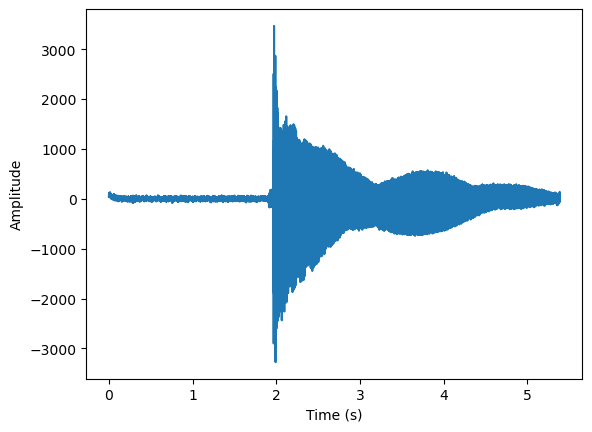

In [45]:
duration_1 = len(string_1[1])/string_1[0]
times_1 = np.arange(0,duration_1,1/string_1[0])
#plot string_1 and label x and y axis
plt.plot(times_1,string_1[1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

(0.0, 400.0)

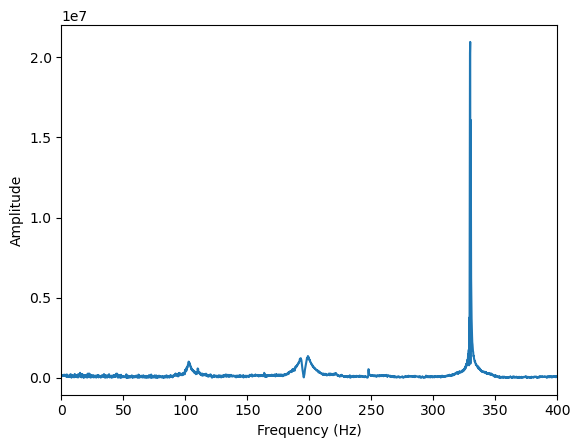

In [16]:
#plot first half of fft of string_1
fft_1 = np.fft.fft(string_1[1])
fft_1_half = fft_1[0:int(len(fft_1)/2)]
freq_1 = np.fft.fftfreq(len(string_1[1]),1/string_1[0])
freq_1_half = freq_1[0:int(len(freq_1)/2)]
plt.plot(freq_1_half,abs(fft_1_half))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, )